In [1]:
%matplotlib inline

import cv2
import imutils
import numpy as np
from matplotlib import pyplot as plt

55 55 [  0 255]


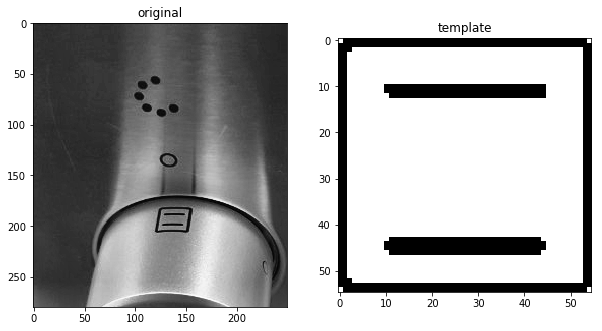

In [8]:
img = cv2.imread('HOG/test/20171118_133024.jpg',0)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img = clahe.apply(img)
img = img[20:300, 100:350].copy()

img2 = img.copy()
template = cv2.imread('HOG/train/f1.jpg',0)
template = cv2.resize(template, (55, 55))
template[template < 210] = 0
template[template >= 210] = 255
w, h = template.shape[::-1]

plt.figure(figsize = (10,6))
plt.subplot(121), plt.imshow(img, cmap = 'gray'), plt.title('original')
plt.subplot(122), plt.imshow(template, cmap = 'gray'), plt.title('template')
print(w, h, np.unique(template))

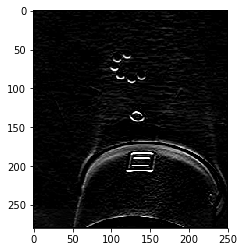

In [6]:
#sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
#abs_sobel64f = np.absolute(sobely)
#sobel_8u = np.uint8(abs_sobel64f)
#sobel = cv2.Sobel(img, cv2.CV_8U,1,1,ksize=3)

sobely8u = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=3)
plt.imshow(sobely8u, cmap="gray")

img = sobely8u
img2 = sobely8u

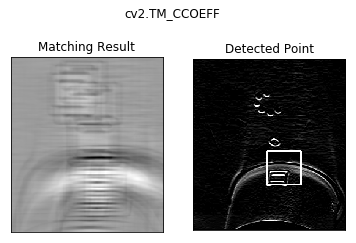

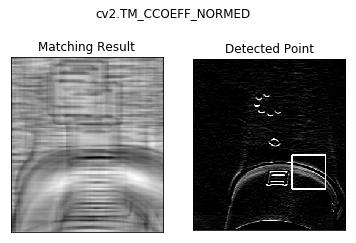

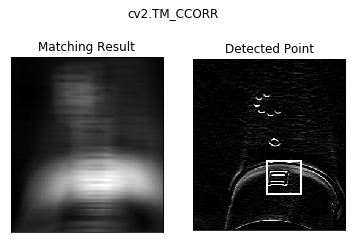

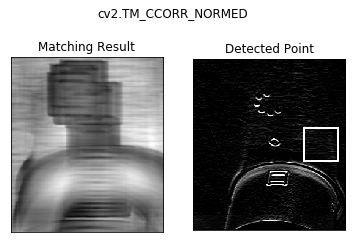

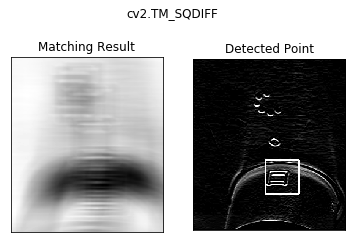

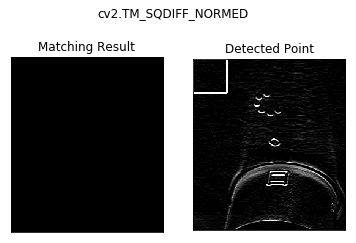

best result: cv2.TM_CCORR


In [7]:
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()
    
print('best result: cv2.TM_CCORR')